In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from google.colab import files
from scipy import stats



%matplotlib inline

In [0]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 11,8

In [0]:
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (2).csv


In [0]:
import io

df = pd.read_csv(io.BytesIO(uploaded['Melbourne_housing_FULL.csv']))

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [0]:
for i in df.columns:
  print(i)
  print(df[i].describe())
  print()

Suburb
count         34857
unique          351
top       Reservoir
freq            844
Name: Suburb, dtype: object

Address
count            34857
unique           34009
top       5 Charles St
freq                 6
Name: Address, dtype: object

Rooms
count    34857.000000
mean         3.031012
std          0.969933
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64

Type
count     34857
unique        3
top           h
freq      23980
Name: Type, dtype: object

Price
count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

Method
count     34857
unique        9
top           S
freq      19744
Name: Method, dtype: object

SellerG
count      34857
unique       388
top       Jellis
freq        3359
Name: SellerG, dtype: object

Date
count          34857
uniq

In [0]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [0]:
df = df.drop(['Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'Address', 'Method', 
              'SellerG', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], 1)

In [0]:
df.head()

,Suburb,Rooms,Type,Price,Date,Distance,Postcode,Car,Landsize
0,Abbotsford,2,h,NaN,3/09/2016,2.5,3067.0,1.0,126.0
1,Abbotsford,2,h,1480000.0,3/12/2016,2.5,3067.0,1.0,202.0
2,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067.0,0.0,156.0
3,Abbotsford,3,u,NaN,4/02/2016,2.5,3067.0,1.0,0.0
4,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067.0,0.0,134.0


In [0]:
df.shape

(34857, 9)

In [0]:
df.dropna().shape

(17701, 9)

In [0]:
df.Price.isnull().sum()

7610

In [0]:
for i in df.columns:
  print(i)
  print(df[i].isnull().sum())
  print()

Suburb
0

Rooms
0

Type
0

Price
7610

Date
0

Distance
1

Postcode
1

Car
8728

Landsize
11810



In [0]:
df = df.drop(['Car', 'Landsize'], 1)

In [0]:
df = df.dropna()

In [0]:
df.shape

(27246, 7)

In [0]:
df.head()

,Suburb,Rooms,Type,Price,Date,Distance,Postcode
1,Abbotsford,2,h,1480000.0,3/12/2016,2.5,3067.0
2,Abbotsford,2,h,1035000.0,4/02/2016,2.5,3067.0
4,Abbotsford,3,h,1465000.0,4/03/2017,2.5,3067.0
5,Abbotsford,3,h,850000.0,4/03/2017,2.5,3067.0
6,Abbotsford,4,h,1600000.0,4/06/2016,2.5,3067.0


In [0]:
df = df.drop(['Date'], 1)

In [0]:
df = pd.get_dummies(df)

In [0]:
df.head()

,Rooms,Price,Distance,Postcode,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,...,Suburb_Travancore,Suburb_Truganina,Suburb_Tullamarine,Suburb_Upwey,Suburb_Vermont,Suburb_Vermont South,Suburb_Viewbank,Suburb_Wallan,Suburb_Wandin North,Suburb_Wantirna,Suburb_Wantirna South,Suburb_Warrandyte,Suburb_Warranwood,Suburb_Waterways,Suburb_Watsonia,Suburb_Watsonia North,Suburb_Wattle Glen,Suburb_Werribee,Suburb_Werribee South,Suburb_West Footscray,Suburb_West Melbourne,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Wildwood,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Suburb_croydon,Suburb_viewbank,Type_h,Type_t,Type_u
1,2,1480000.0,2.5,3067.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1035000.0,2.5,3067.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,1465000.0,2.5,3067.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,3,850000.0,2.5,3067.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,4,1600000.0,2.5,3067.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
corrmat = df.corr()

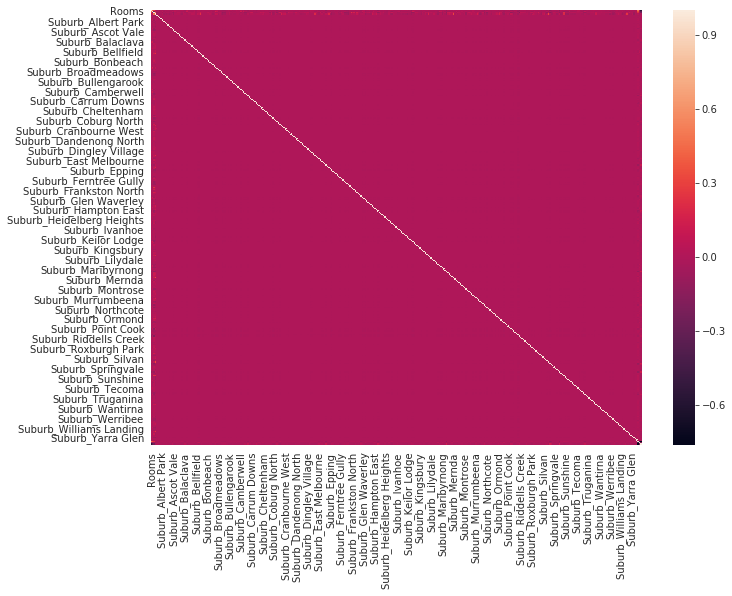

In [0]:
sns.heatmap(corrmat)

In [0]:
X = df[['Rooms', 'Distance', 'Postcode']]
y = df['Price']

In [0]:
linreg = LinearRegression()

linreg.fit(X, y)
linreg.score(X, y)

0.38850762020097085